In [1]:
from chinese_checkers.simulation.SimulationData import SimulationData
from chinese_checkers.simulation.SimulationMetadata import SimulationMetadata
from src.chinese_checkers.game.ChineseCheckersGame import ChineseCheckersGame
from src.chinese_checkers.geometry.Printer import Printer
from src.chinese_checkers.simulation.GameSimulation import GameSimulation
from src.chinese_checkers.model.BootstrapModel import BootstrapModel
from src.chinese_checkers.simulation.SimulationCatalog import SimulationCatalog

---

### Sample target positions

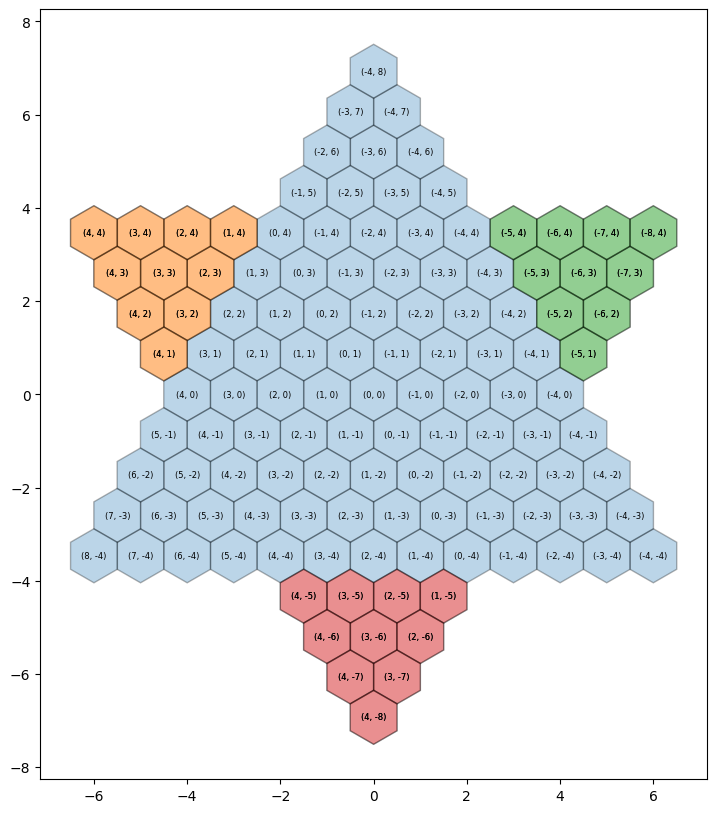

In [2]:
# set up the game
printer = Printer(plot_size=10, show_coordinates=True)
game = ChineseCheckersGame.start_game(3)

printer.print(
    game.board.hexagram_points,
    game.players[0].positions,
    game.players[1].positions,
    game.players[2].positions,
)

---
### Simulate a game between three centroid models

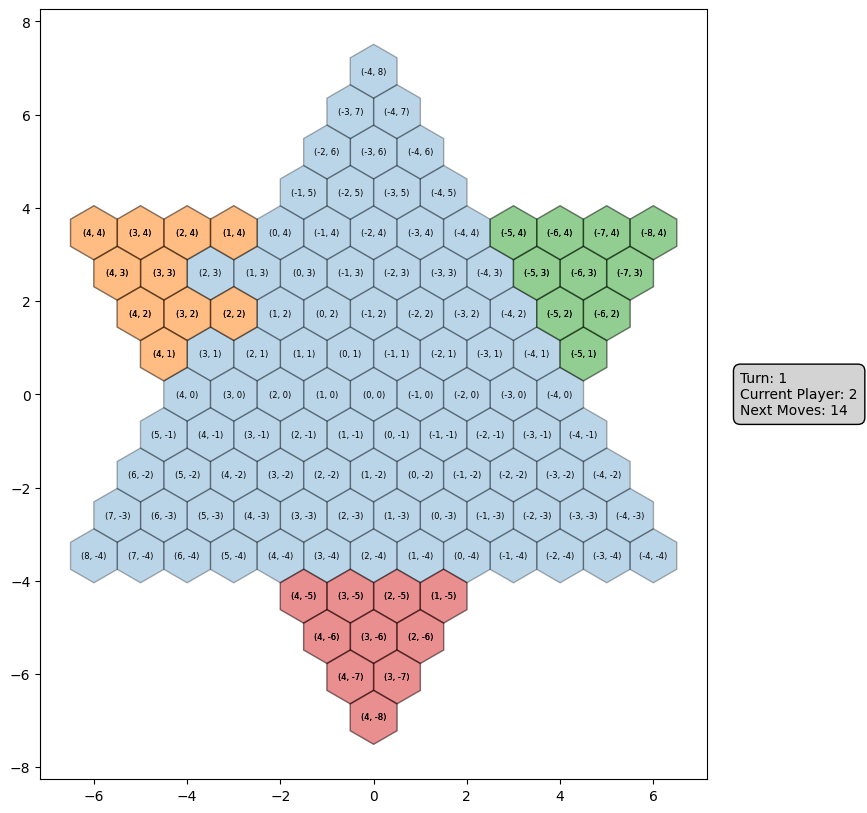

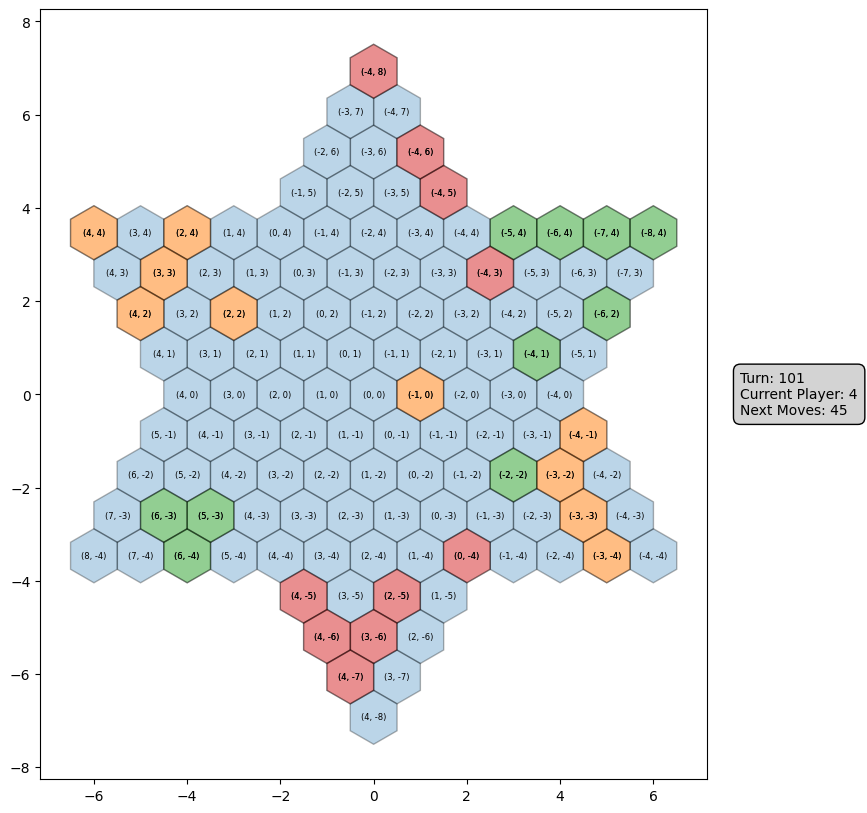

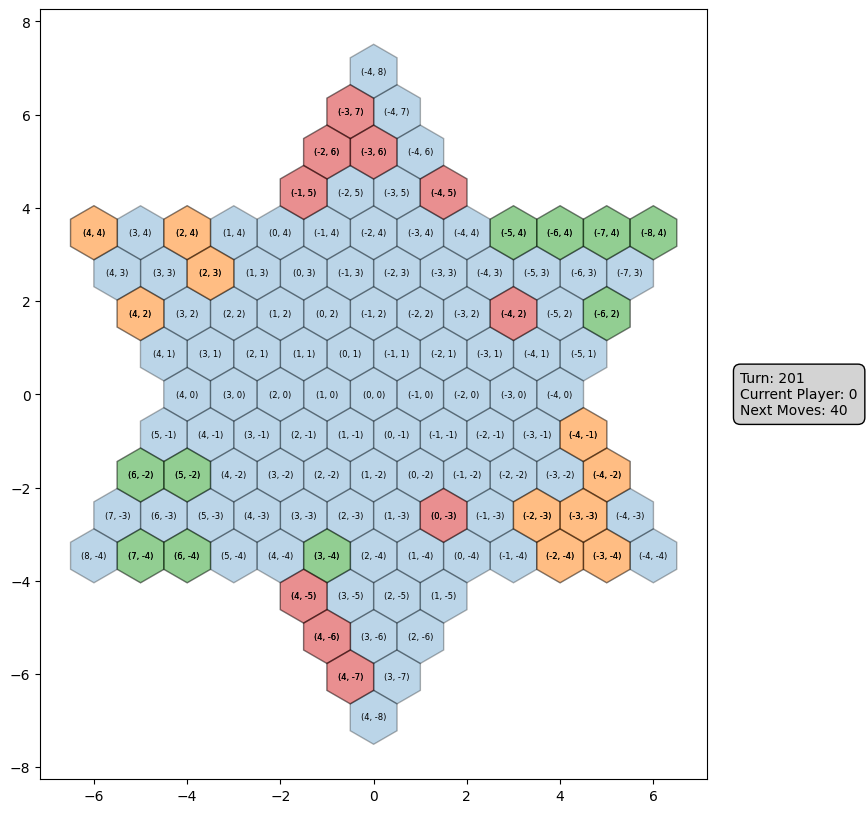

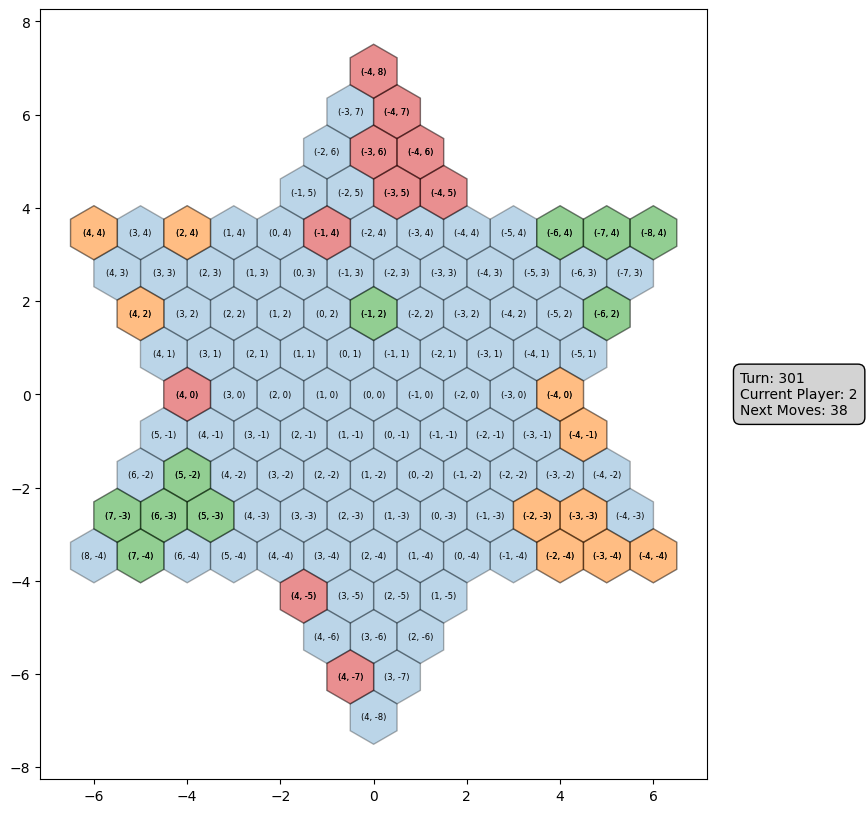

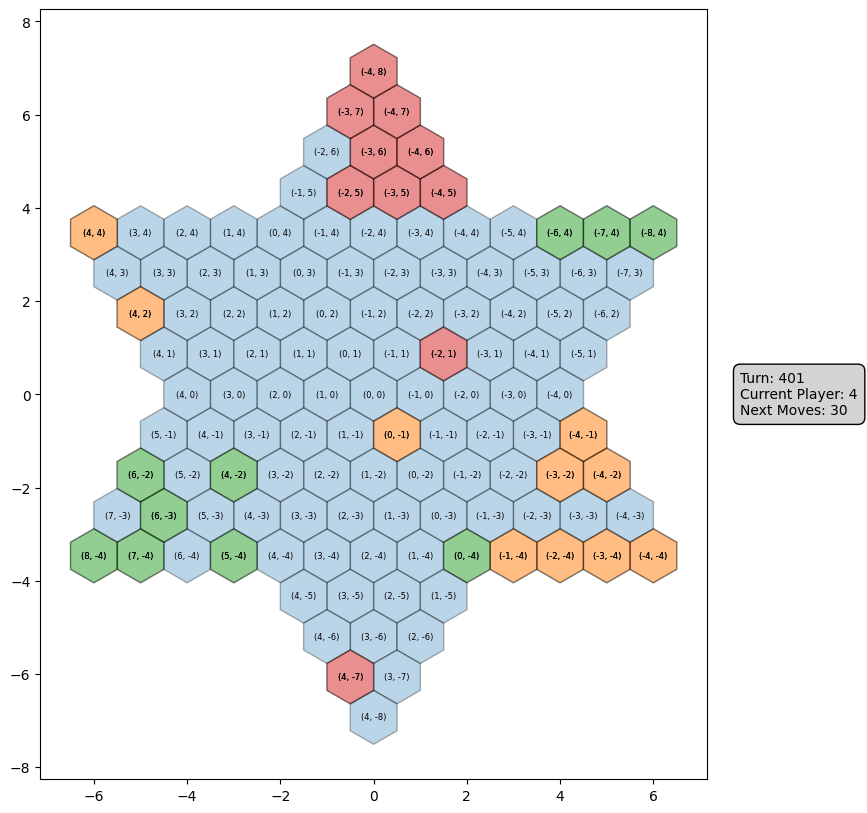

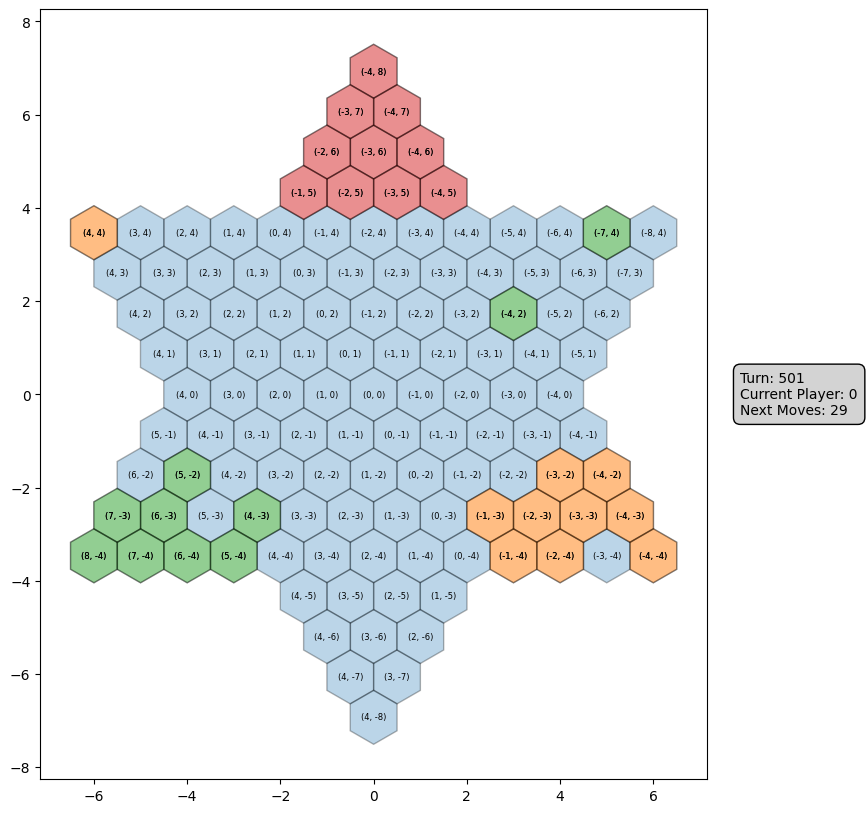

In [3]:
model_1 = BootstrapModel()
model_2 = BootstrapModel()
model_3 = BootstrapModel()

game_simulation = GameSimulation.simulate_game(
    models=[model_1, model_2, model_3],
    name="bootstrap-simulation",
    version="v0.0.1",
    print_period=100,
    show_coordinates=True
)
game_metadata: SimulationMetadata = game_simulation.metadata
game_data: SimulationData = game_simulation.data

Creating Animation:   0%|          | 0/51 [00:00<?, ?it/s]


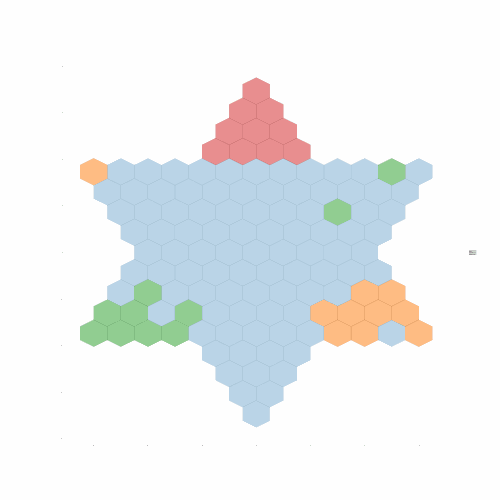

In [4]:
game_simulation.display()

In [ ]:
game_simulation.save_animation()

---
### Generate a Training Data from the Bootstrap Model

In [8]:
catalog = SimulationCatalog()

In [9]:
for game_number in range(10):
    try:
        game_simulation = GameSimulation.simulate_game(
            models=[model_1, model_2, model_3],
            name="bootstrap-simulation",
            version="v0.0.1"
        )
        game_metadata: SimulationMetadata = game_simulation.metadata
        game_data: SimulationData = game_simulation.data

        winner_id = game_metadata.winning_player
        print(f"Game Number {game_number}, Winner {winner_id}")

        catalog.save_simulation(game_simulation)

    except Exception as e:
        print(f"Game Number {game_number} not completed due to error: {e}")

Game Number 0, Winner None
Game Number 1, Winner None
Game Number 2, Winner None
Game Number 3, Winner None
Game Number 4, Winner None
Game Number 5, Winner None
Game Number 6, Winner None
Game Number 7, Winner None
Game Number 8, Winner None
Game Number 9, Winner None


Metadata SimulationMetadata(player_count=2, board_size=4, max_game_length=1000, winning_player='None', name='bootstrap-simulation', version='v0.0.1'), Simulation Count 957


Creating Animation:   0%|          | 0/37 [00:00<?, ?it/s]


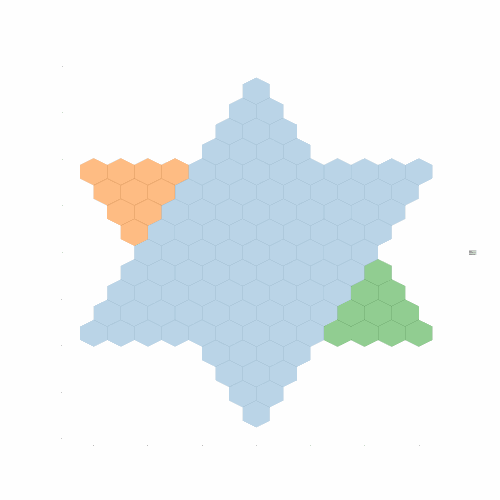

Metadata SimulationMetadata(player_count=3, board_size=4, max_game_length=1000, winning_player='None', name='bootstrap-simulation', version='v0.0.1'), Simulation Count 10


Creating Animation:   0%|          | 0/53 [00:00<?, ?it/s]


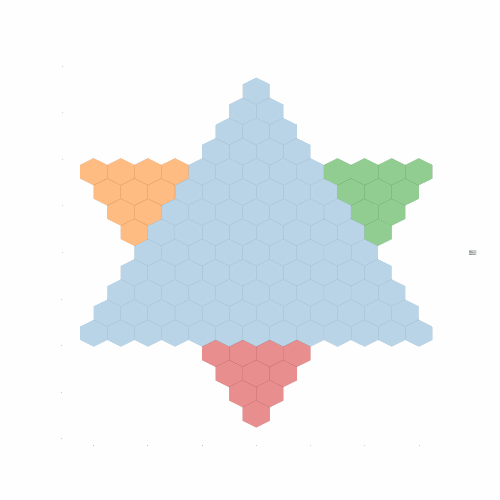

In [10]:
metadata_list = catalog.list_available_metadata()

for metadata in metadata_list:
    simulations = list(catalog.load_simulations_by_metadata(metadata))
    print(f"Metadata {metadata}, Simulation Count {len(simulations)}")
    
    display(simulations[4].display(sample_period=10))